In [1]:
import tensorflow as tf

from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = load_data(path="nmist.npz")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
# .0 은 실수로 변경
# 스케일링 하고싶으면 최고 값으로 나누면 1이되고 최저 값은 0이 된다.
x_train_scale = x_train / 255.0
x_test_scale = x_test / 255.0

In [ ]:
# 입력데이터를 평탄화 해준다. Flatten
# 인풋쉐입이 안들어가도 되는 이유는 플랫튼을 사용했기 때문에 따로 작성 할 필요가 없다.
model01 = Sequential([
    Flatten(),
    Dense(8, activation=tf.nn.relu),
    Dense(64, activation=tf.nn.relu),
    Dense(32, activation=tf.nn.relu),
    Dense(10, activation=tf.nn.softmax)

])

In [6]:
model01.compile(loss="sparse_categorical_crossentropy", optimizer=SGD(), metrics=["acc"])

In [7]:
result01 = model01.fit(x_train_scale, y_train, epochs=100, validation_split=0.3, batch_size=100)

Epoch 1/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.0997 - loss: 2.2798 - val_acc: 0.2964 - val_loss: 2.0698
Epoch 2/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - acc: 0.3676 - loss: 1.9316 - val_acc: 0.5154 - val_loss: 1.5205
Epoch 3/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - acc: 0.5659 - loss: 1.3838 - val_acc: 0.6808 - val_loss: 1.0399
Epoch 4/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - acc: 0.6932 - loss: 0.9591 - val_acc: 0.7446 - val_loss: 0.7779
Epoch 5/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - acc: 0.7505 - loss: 0.7523 - val_acc: 0.7947 - val_loss: 0.6419
Epoch 6/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - acc: 0.8033 - loss: 0.6211 - val_acc: 0.8389 - val_loss: 0.5298
Epoch 7/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - acc: 0.8399 - loss: 0.5228 - val_acc: 0.8583 - val_loss: 0.4701
Epoch 8/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - acc: 0.8585 - loss: 0.4762 - val_acc: 0.8721 - val_loss: 0.4303
Epoch 9/100
420/420 ━━━━━━━━━━━━━━

In [8]:
model01.evaluate(x_test_scale, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - acc: 0.9302 - loss: 0.2371


[0.21401582658290863, 0.9383000135421753]

In [9]:
model02 = Sequential([
    Flatten(),
    Dense(8, activation=tf.nn.relu),
    Dense(64, activation=tf.nn.relu),
    Dropout(0.2),
    Dense(32, activation=tf.nn.relu),
    Dense(10, activation=tf.nn.softmax)

])

In [10]:
model02.compile(loss="sparse_categorical_crossentropy", optimizer=SGD(), metrics=["acc"])

In [ ]:
# loss 가 더 이상 감소하지 않는 값(최소값)이 3번 나오면 학습을 중단
# 만약 학습이 모두 완료 되었다면 학습이 부족하다고 느껴서 끝까지 실행된 것이다.
# 이런 경우는 epochs를 늘리면 된다.
early_stooping = EarlyStopping(monitor="loss", patience=3)

In [12]:
# callbacks 내가 원하는 함수를 실행해줘.
result02 = model02.fit(x_train_scale, y_train, epochs=100, callbacks=[early_stooping], validation_split=0.3, batch_size=100)

Epoch 1/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.1766 - loss: 2.2561 - val_acc: 0.4001 - val_loss: 1.8125
Epoch 2/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - acc: 0.4363 - loss: 1.6519 - val_acc: 0.7016 - val_loss: 0.9764
Epoch 3/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - acc: 0.6739 - loss: 0.9701 - val_acc: 0.8125 - val_loss: 0.6342
Epoch 4/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - acc: 0.7690 - loss: 0.7127 - val_acc: 0.8446 - val_loss: 0.5216
Epoch 5/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - acc: 0.8134 - loss: 0.6093 - val_acc: 0.8590 - val_loss: 0.4729
Epoch 6/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - acc: 0.8335 - loss: 0.5478 - val_acc: 0.8697 - val_loss: 0.4395
Epoch 7/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - acc: 0.8470 - loss: 0.5096 - val_acc: 0.8768 - val_loss: 0.4157
Epoch 8/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - acc: 0.8565 - loss: 0.4851 - val_acc: 0.8823 - val_loss: 0.3994
Epoch 9/100
420/420 ━━━━━━━━━━━━━━

In [ ]:
# 평가
model02.evaluate(x_test_scale, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - acc: 0.9375 - loss: 0.2153


[0.1977488100528717, 0.942300021648407]

In [14]:
model03 = Sequential([
    Flatten(),
    Dense(8, activation=tf.nn.relu),
    Dense(64, activation=tf.nn.relu),
    Dropout(0.5),
    Dense(32, activation=tf.nn.relu),
    Dense(10, activation=tf.nn.softmax)

])

In [15]:
model03.compile(loss="sparse_categorical_crossentropy", optimizer=SGD(), metrics=["acc"])

In [16]:
result03 = model03.fit(x_train_scale, y_train, epochs=100, callbacks=[early_stooping], validation_split=0.3, batch_size=100)

Epoch 1/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.1324 - loss: 2.2673 - val_acc: 0.4133 - val_loss: 1.9244
Epoch 2/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - acc: 0.3765 - loss: 1.8139 - val_acc: 0.7193 - val_loss: 1.0320
Epoch 3/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - acc: 0.6159 - loss: 1.1444 - val_acc: 0.8119 - val_loss: 0.6770
Epoch 4/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - acc: 0.7222 - loss: 0.8628 - val_acc: 0.8497 - val_loss: 0.5356
Epoch 5/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.7710 - loss: 0.7315 - val_acc: 0.8652 - val_loss: 0.4700
Epoch 6/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - acc: 0.7986 - loss: 0.6629 - val_acc: 0.8740 - val_loss: 0.4312
Epoch 7/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - acc: 0.8180 - loss: 0.6048 - val_acc: 0.8779 - val_loss: 0.4115
Epoch 8/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - acc: 0.8320 - loss: 0.5728 - val_acc: 0.8826 - val_loss: 0.3953
Epoch 9/100
420/420 ━━━━━━━━━━━━━━━━

In [17]:
model03.evaluate(x_test_scale, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - acc: 0.9111 - loss: 0.2961


[0.2653948664665222, 0.9218000173568726]

In [ ]:
# Dropout을 함으로써 오버핏팅이 예방되고 모델도 단순해진다.  피쳐스 셀렉트와 같은 의미로 보인다.

model04 = Sequential([
    Flatten(),
    Dense(8, activation=tf.nn.relu),
    Dense(64, activation=tf.nn.relu),
    Dropout(0.75),
    Dense(32, activation=tf.nn.relu),
    Dense(10, activation=tf.nn.softmax)

])

In [19]:
model04.compile(loss="sparse_categorical_crossentropy", optimizer=SGD(), metrics=["acc"])

In [20]:
result04 = model04.fit(x_train_scale, y_train, epochs=100, callbacks=[early_stooping], validation_split=0.3, batch_size=100)

Epoch 1/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.1344 - loss: 2.2716 - val_acc: 0.3225 - val_loss: 2.1072
Epoch 2/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - acc: 0.2873 - loss: 2.0898 - val_acc: 0.5250 - val_loss: 1.7691
Epoch 3/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - acc: 0.4150 - loss: 1.7852 - val_acc: 0.6252 - val_loss: 1.3188
Epoch 4/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - acc: 0.5233 - loss: 1.4633 - val_acc: 0.7006 - val_loss: 1.0588
Epoch 5/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - acc: 0.6025 - loss: 1.2386 - val_acc: 0.7519 - val_loss: 0.8794
Epoch 6/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - acc: 0.6489 - loss: 1.0958 - val_acc: 0.7756 - val_loss: 0.7665
Epoch 7/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - acc: 0.6747 - loss: 1.0020 - val_acc: 0.7900 - val_loss: 0.6900
Epoch 8/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - acc: 0.7028 - loss: 0.9373 - val_acc: 0.8013 - val_loss: 0.6401
Epoch 9/100
420/420 ━━━━━━━━━━━━━━

In [21]:
model04.evaluate(x_test_scale, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - acc: 0.8950 - loss: 0.3649


[0.3260403275489807, 0.9071000218391418]

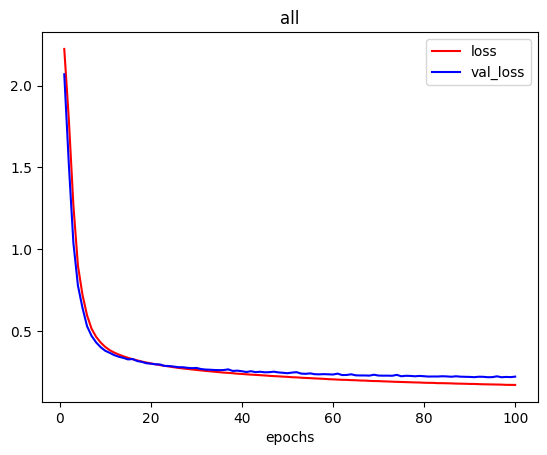

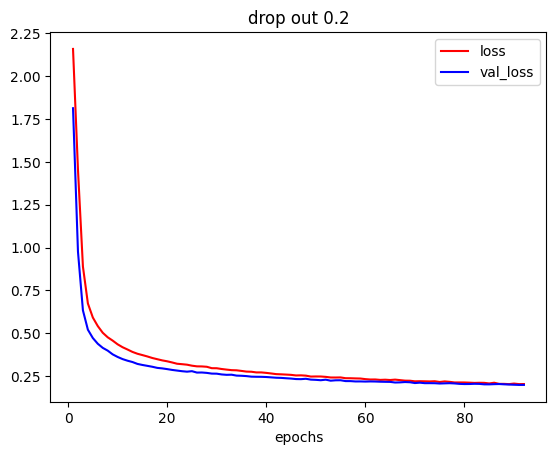

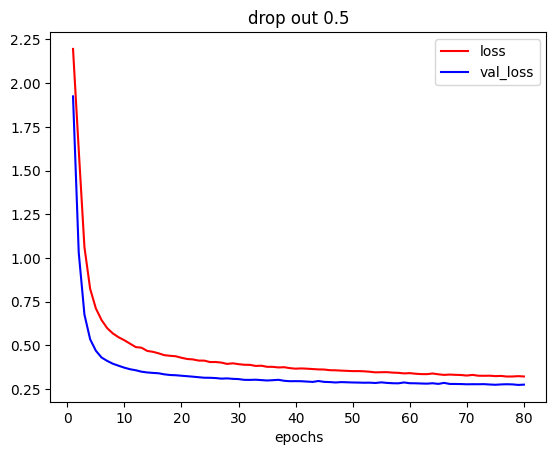

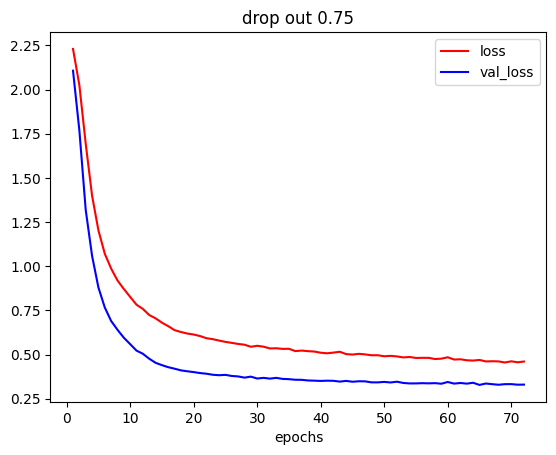

In [23]:
result_list =[result01, result02, result03, result04]
title_list = ["all", "drop out 0.2", "drop out 0.5", "drop out 0.75"]

for idx, result in enumerate(result_list):
    epochs = range(1, len(result.history["loss"]) + 1)

    plt.plot(epochs, result.history["loss"], color="red", label="loss")
    plt.plot(epochs, result.history["val_loss"], color="blue", label="val_loss")

    plt.xlabel("epochs")
    plt.title(title_list[idx])
    plt.legend()
    plt.show()